<a href="https://colab.research.google.com/github/norah-kuduk/cs4010/blob/main/Cyber_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## API Info

Breach Model (https://haveibeenpwned.com/api/v3/breaches'):

<table border="1" cellspacing="0" cellpadding="8">
  <thead>
    <tr>
      <th>Attribute</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>Name</td><td>string</td><td>A Pascal-cased name representing the breach which is unique across all other breaches. This value never changes and may be used to name dependent assets (such as images) but should not be shown directly to end users (see the "Title" attribute instead).</td></tr>
    <tr><td>Title</td><td>string</td><td>A descriptive title for the breach suitable for displaying to end users. It's unique across all breaches but individual values may change in the future. If a stable value is required to reference the breach, refer to the "Name" attribute instead.</td></tr>
    <tr><td>Domain</td><td>string</td><td>The domain of the primary website the breach occurred on. This may be used for identifying other assets external systems may have for the site.</td></tr>
    <tr><td>BreachDate</td><td>date</td><td>The date (with no time) the breach originally occurred on in ISO 8601 format. This is not always accurate — frequently breaches are discovered and reported long after the original incident. Use this attribute as a guide only.</td></tr>
    <tr><td>AddedDate</td><td>datetime</td><td>The date and time (precision to the minute) the breach was added to the system in ISO 8601 format.</td></tr>
    <tr><td>ModifiedDate</td><td>datetime</td><td>The date and time (precision to the minute) the breach was modified in ISO 8601 format. This will only differ from the AddedDate if attributes change or data in the breach is updated.</td></tr>
    <tr><td>PwnCount</td><td>integer</td><td>The total number of accounts loaded into the system. This is usually less than the total reported by media due to duplication or data integrity issues in the source data.</td></tr>
    <tr><td>Description</td><td>string</td><td>Contains an overview of the breach represented in HTML markup. May include tags like emphasis, strong, and hyperlinks.</td></tr>
    <tr><td>DataClasses</td><td>string[]</td><td>Alphabetically ordered string array describing the nature of the compromised data.</td></tr>
    <tr><td>IsVerified</td><td>boolean</td><td>Indicates that the breach is considered unverified. An unverified breach may not have originated from the indicated website.</td></tr>
    <tr><td>IsFabricated</td><td>boolean</td><td>Indicates that the breach is considered fabricated. It usually contains manufactured data but includes some legitimate addresses.</td></tr>
    <tr><td>IsSensitive</td><td>boolean</td><td>Indicates if the breach is considered sensitive. Public API will not return accounts for sensitive breaches.</td></tr>
    <tr><td>IsRetired</td><td>boolean</td><td>Indicates if the breach has been retired. Data is permanently removed and will not be returned by the API.</td></tr>
    <tr><td>IsSpamList</td><td>boolean</td><td>Indicates if the breach is considered a spam list. No impact on other attributes.</td></tr>
    <tr><td>IsMalware</td><td>boolean</td><td>Indicates if the breach is sourced from malware. No impact on other attributes.</td></tr>
    <tr><td>IsSubscriptionFree</td><td>boolean</td><td>Indicates if the breach is subscription free. Only relevant in domain search context with insufficient subscription.</td></tr>
    <tr><td>IsStealerLog</td><td>boolean</td><td>Indicates if the breach is sourced from stealer logs. Related domains can be accessed via the stealer logs API.</td></tr>
    <tr><td>LogoPath</td><td>string</td><td>A URI specifying where a PNG logo for the breached service can be found.</td></tr>
  </tbody>
</table>

## Project Plan


* **Data Loading and Cleaning**
  * Load raw breach data into `clean_df`.
  * Convert date columns (`BreachDate`, `AddedDate`, `ModifiedDate`) to datetime format.
  * Normalize the `DataClasses` column using `.explode()` if needed.
  * Drop or handle missing/null values.

* **Exploratory Data Analysis (EDA)**
  * Count breaches per year using `BreachDate`.
  * Summarize total pwned accounts with `PwnCount`.
  * Identify most common `DataClasses` across breaches.
  * Explore `Is...` flags (e.g., `IsVerified`, `IsFabricated`) for trends.

* **Visualization**
  * Make intesting visualizations depending on what sticks out during exploration.

* **Optional Extensions**
  * Create an interactive dashboard using Plotly Dash.

## Loading Data

In [2]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import HTML

In [3]:
# public endpoint - no API key needed
url = 'https://haveibeenpwned.com/api/v3/breaches'

response = requests.get(url)

# Handle response
if response.status_code == 200:
    breaches = response.json()
    print(f"Retrieved {len(breaches)} breaches.")
else:
    print(f"Failed to fetch: {response.status_code} - {response.text}")


Retrieved 884 breaches.


In [4]:
df = pd.DataFrame(breaches)

In [5]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree,IsStealerLog
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26T23:35:45Z,2017-12-10T21:44:27Z,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, IP addresses, Names, Passwords]",True,False,False,False,False,False,False,False
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15T00:59:50Z,2020-11-15T01:07:10Z,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, IP addresses, Names, Passwor...",True,False,False,False,False,False,False,False
2,126,126,126.com,2012-01-01,2016-10-08T07:46:05Z,2016-10-08T07:46:05Z,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords]",False,False,False,False,False,False,False,False
3,17Media,17,17app.co,2016-04-19,2016-07-08T01:55:03Z,2016-07-08T01:55:03Z,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"[Device information, Email addresses, IP addre...",True,False,False,False,False,False,False,False
4,17173,17173,17173.com,2011-12-28,2018-04-28T04:53:15Z,2018-04-28T04:53:15Z,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"[Email addresses, Passwords, Usernames]",False,False,False,False,False,False,False,False


## Data Cleaning

In [6]:
# Parse and clean
df['BreachDate'] = pd.to_datetime(df['BreachDate'])
df['DataClassesStr'] = df['DataClasses'].apply(lambda x: ', '.join(x))

# Keep useful columns
clean_df = df[[
    'Title', 'Name', 'Domain', 'BreachDate', 'Description', 'PwnCount', 'DataClassesStr',
    'IsVerified', 'IsSensitive', 'IsSpamList', 'IsRetired', 'IsMalware', 'IsStealerLog'
]].rename(columns={
    'Title': 'BreachTitle',
    'Name': 'BreachName',
    'Domain': 'DomainName',
    'DataClassesStr': 'LeakedDataTypes',
})

clean_df.head()

,BreachTitle,BreachName,DomainName,BreachDate,Description,PwnCount,LeakedDataTypes,IsVerified,IsSensitive,IsSpamList,IsRetired,IsMalware,IsStealerLog
0,000webhost,000webhost,000webhost.com,2015-03-01,"In approximately March 2015, the free web host...",14936670,"Email addresses, IP addresses, Names, Passwords",True,False,False,False,False,False
1,123RF,123RF,123rf.com,2020-03-22,"In March 2020, the stock photo site <a href=""h...",8661578,"Email addresses, IP addresses, Names, Password...",True,False,False,False,False,False
2,126,126,126.com,2012-01-01,"In approximately 2012, it's alleged that the C...",6414191,"Email addresses, Passwords",False,False,False,False,False,False
3,17,17Media,17app.co,2016-04-19,"In April 2016, customer data obtained from the...",4009640,"Device information, Email addresses, IP addres...",True,False,False,False,False,False
4,17173,17173,17173.com,2011-12-28,"In late 2011, <a href=""https://news.softpedia....",7485802,"Email addresses, Passwords, Usernames",False,False,False,False,False,False


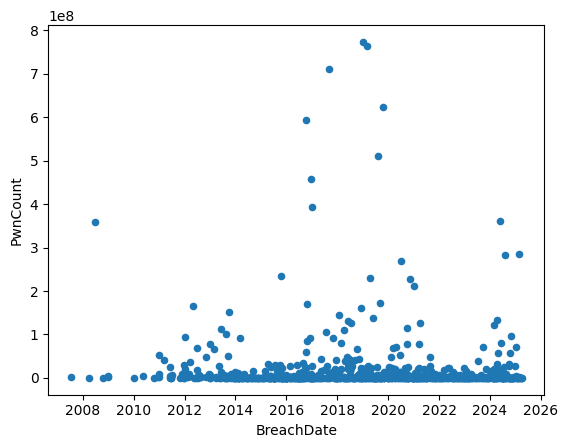

In [ ]:
# plot for breach date vs pwn count
df.plot(x='BreachDate', y='PwnCount', kind='scatter')
plt.show()

## Exploration

In [ ]:
top_breaches = clean_df.sort_values(by='PwnCount', ascending=False).head(15)

fig1 = px.bar(
    top_breaches,
    x='PwnCount',
    y='BreachTitle',
    orientation='h',
    title='Top 15 Breaches by Accounts Affected',
    hover_data=['BreachDate', 'DomainName']
)
fig1.show()

In [ ]:
# Select relevant columns
top_15_info = top_breaches[['BreachTitle', 'BreachDate', 'Description']].copy()

# Format the date to a nice readable string
top_15_info['BreachDate'] = top_15_info['BreachDate'].dt.strftime('%Y-%m-%d')

# Create an HTML table
html_table = top_15_info.to_html(escape=False, index=False)

# Display the HTML
HTML(html_table)


BreachTitle,BreachDate,Description
Collection #1,2019-01-07,"In January 2019, a large collection of credential stuffing lists (combinations of email addresses and passwords used to hijack accounts on other services) was discovered being distributed on a popular hacking forum. The data contained almost 2.7 billion records including 773 million unique email addresses alongside passwords those addresses had used on other breached services. Full details on the incident and how to search the breached passwords are provided in the blog post The 773 Million Record ""Collection #1"" Data Breach."
Verifications.io,2019-02-25,"In February 2019, the email address validation service verifications.io suffered a data breach. Discovered by Bob Diachenko and Vinny Troia, the breach was due to the data being stored in a MongoDB instance left publicly facing without a password and resulted in 763 million unique email addresses being exposed. Many records within the data also included additional personal attributes such as names, phone numbers, IP addresses, dates of birth and genders. No passwords were included in the data. The Verifications.io website went offline during the disclosure process, although an archived copy remains viewable."
Onliner Spambot,2017-08-28,"In August 2017, a spambot by the name of Onliner Spambot was identified by security researcher Benkow moʞuƎq. The malicious software contained a server-based component located on an IP address in the Netherlands which exposed a large number of files containing personal information. In total, there were 711 million unique email addresses, many of which were also accompanied by corresponding passwords. A full write-up on what data was found is in the blog post titled Inside the Massive 711 Million Record Onliner Spambot Dump."
Data Enrichment Exposure From PDL Customer,2019-10-16,"In October 2019, security researchers Vinny Troia and Bob Diachenko identified an unprotected Elasticsearch server holding 1.2 billion records of personal data. The exposed data included an index indicating it was sourced from data enrichment company People Data Labs (PDL) and contained 622 million unique email addresses. The server was not owned by PDL and it's believed a customer failed to properly secure the database. Exposed information included email addresses, phone numbers, social media profiles and job history data."
Exploit.In,2016-10-13,"In late 2016, a huge list of email address and password pairs appeared in a ""combo list"" referred to as ""Exploit.In"". The list contained 593 million unique email addresses, many with multiple different passwords hacked from various online systems. The list was broadly circulated and used for ""credential stuffing"", that is attackers employ it in an attempt to identify other online systems where the account owner had reused their password. For detailed background on this incident, read Password reuse, credential stuffing and another billion records in Have I Been Pwned."
Facebook,2019-08-01,"In April 2021, a large data set of over 500 million Facebook users was made freely available for download. Encompassing approximately 20% of Facebook's subscribers, the data was allegedly obtained by exploiting a vulnerability Facebook advises they rectified in August 2019. The primary value of the data is the association of phone numbers to identities; whilst each record included phone, only 2.5 million contained an email address. Most records contained names and genders with many also including dates of birth, location, relationship status and employer."
Anti Public Combo List,2016-12-16,"In December 2016, a huge list of email address and password pairs appeared in a ""combo list"" referred to as ""Anti Public"". The list contained 458 million unique email addresses, many with multiple different passwords hacked from various online systems. The list was broadly circulated and used for ""credential stuffing"", that is attackers employ it in an attempt to identify other on

In [17]:
clean_df['Year'] = pd.to_datetime(clean_df['BreachDate']).dt.year
breaches_per_year = clean_df.groupby('Year').size().reset_index(name='Count')

fig2 = px.bar(
    breaches_per_year,
    x='Year',
    y='Count',
    title='Number of Breaches Per Year'
)
fig2.show()


In [14]:
verified_counts = clean_df['IsVerified'].value_counts().rename({True: 'Verified', False: 'Unverified'}).reset_index()
verified_counts.columns = ['VerificationStatus', 'Count']

fig3 = px.pie(
    verified_counts,
    names='VerificationStatus',
    values='Count',
    title='Verified vs Unverified Breaches'
)
fig3.show()


Offers insight into the credibility and validation of breach claims.

In [16]:
sensitive_counts = clean_df['IsSensitive'].value_counts().rename({True: 'Sensitive', False: 'Non-Sensitive'}).reset_index()
sensitive_counts.columns = ['Sensitivity', 'Count']

fig4 = px.pie(
    sensitive_counts,
    names='Sensitivity',
    values='Count',
    title='Sensitive vs Non-Sensitive Breaches'
)
fig4.show()


In [ ]:
# Convert to list if not already
clean_df['LeakedDataTypes'] = clean_df['LeakedDataTypes'].str.split(', ')
exploded = clean_df.explode('LeakedDataTypes')
type_counts = exploded['LeakedDataTypes'].value_counts().reset_index()
type_counts.columns = ['LeakedDataType', 'Count']

fig5 = px.bar(
    type_counts.head(20),
    x='Count',
    y='LeakedDataType',
    orientation='h',
    title='Most Common Leaked Data Types'
)
fig5.show()


In [12]:
spam_counts = clean_df['IsSpamList'].value_counts().rename({True: 'Spam List', False: 'Other'}).reset_index()
spam_counts.columns = ['Type', 'Count']

fig6 = px.pie(
    spam_counts,
    names='Type',
    values='Count',
    title='Spam List vs Other Breaches'
)
fig6.show()


In [ ]:
domain_counts = clean_df['DomainName'].value_counts().head(20).reset_index()
domain_counts.columns = ['DomainName', 'Count']

fig7 = px.bar(
    domain_counts,
    x='Count',
    y='DomainName',
    orientation='h',
    title='Top 20 Breached Domains'
)
fig7.show()


In [19]:
df_year_verified = clean_df.groupby(['Year', 'IsVerified']).size().reset_index(name='Count')

fig8 = px.bar(
    df_year_verified,
    x='Year',
    y='Count',
    color='IsVerified',
    barmode='group',
    title='Verified vs Unverified Breaches Over Time'
)
fig8.show()


In [20]:
accounts_per_year = clean_df.groupby('Year')['PwnCount'].sum().reset_index()

fig9 = px.line(
    accounts_per_year,
    x='Year',
    y='PwnCount',
    title='Total Accounts Affected Per Year'
)
fig9.show()


In [28]:

# Get the 'Is...' columns
is_flags = [col for col in clean_df.columns if col.startswith("Is")]

# Count how many times each is_flag is False
flag_counts = clean_df[is_flags].sum().sort_values(ascending=False)

# Create a Plotly bar chart
fig11 = px.bar(
    x=flag_counts.values,
    y=flag_counts.index,
    orientation='h',
    labels={'x': 'Count of Breaches', 'y': 'Breach Attribute'},
    title="Total Number of Breaches by 'Is...' Flags",
    text_auto=True,
)

fig11.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    template='plotly_white'
)

fig11.show()


In [23]:
fig12 = px.box(
    clean_df,
    x='IsVerified',
    y='PwnCount',
    title='Distribution of Accounts Affected by Verification Status',
    log_y=True
)
fig12.show()


In [11]:
bottom_breaches = clean_df.sort_values(by='PwnCount', ascending=True).head(15)

fig13 = px.bar(
    top_breaches,
    x='PwnCount',
    y='BreachTitle',
    orientation='h',
    title='Top 15 Breaches by Accounts Affected',
    hover_data=['BreachDate', 'DomainName']
)
fig13.show()

In [12]:
# Select relevant columns
bottom_15_info = bottom_breaches[['BreachTitle', 'BreachDate', 'Description']].copy()

# Format the date to a nice readable string
bottom_15_info['BreachDate'] = bottom_15_info['BreachDate'].dt.strftime('%Y-%m-%d')

# Create an HTML table
html_table = bottom_15_info.to_html(escape=False, index=False)

# Display the HTML
HTML(html_table)

BreachTitle,BreachDate,Description
WPSandbox,2018-11-04,"In November 2018, the WordPress sandboxing service that allows people to create temporary websites WP Sandbox discovered their service was being used to host a phishing site attempting to collect Microsoft OneDrive accounts. After identifying the malicious site, WP Sandbox took it offline, contacted the 858 people who provided information to it then self-submitted their addresses to HIBP. The phishing page requested both email addresses and passwords."
devkitPro,2019-02-03,"In February 2019, the devkitPro forum suffered a data breach. The phpBB based forum had 1,508 unique email addresses exposed in the breach alongside forum posts, private messages and passwords stored as weak salted hashes. The data breach was self-submitted to HIBP by the forum operator."
Tesco,2014-02-12,"In February 2014, over 2,000 Tesco accounts with usernames, passwords and loyalty card balances appeared on Pastebin. Whilst the source of the breach is not clear, many confirmed the credentials were valid for Tesco and indeed they have a history of poor online security."
UN Internet Governance Forum,2014-02-20,"In February 2014, the Internet Governance Forum (formed by the United Nations for policy dialogue on issues of internet governance) was attacked by hacker collective known as Deletesec. Although tasked with ""ensuring the security and stability of the Internet"", the IGF’s website was still breached and resulted in the leak of 3,200 email addresses, names, usernames and cryptographically stored passwords."
Bestialitysextaboo,2018-03-19,"In March 2018, the animal bestiality website known as Bestialitysextaboo was hacked. A collection of various sites running on the same service were also compromised and details of the hack (including links to the data) were posted on a popular forum. In all, more than 3.2k unique email addresses were included alongside usernames, IP addresses, dates of birth, genders and bcrypt hashes of passwords."
Biohack.me,2016-12-02,"In December 2016, the forum for the biohacking website Biohack.me suffered a data breach that exposed 3.4k accounts. The data included usernames, email addresses and hashed passwords along with the private messages of forum members. The data was self-submitted to HIBP by the Biohack.me operators."
Roblox Developer Conference (2023),2020-12-18,"In July 2023, a list of alleged attendees from the 2017-2020 Roblox Developers Conferences was circulated on a forum. The data contained 4k unique email addresses along with names, usernames, dates of birth, phone numbers, physical and IP addresses and T-shirt sizes"
BreachForums Clone,2023-06-17,"In June 2023, a clone of the previously shuttered popular hacking forum ""BreachForums"" suffered a data breach that exposed over 4k records. The breach was due to an exposed backup of the MyBB database which included email and IP addresses, usernames and Argon2 password hashes."
KiwiFarms,2019-09-10,"In September 2019, the forum for discussing ""lolcows"" (people who can be milked for laughs) Kiwi Farms suffered a data breach. The disclosure notice advised that email and IP addresses, dates of birth and content created by members were all exposed in the incident."
Switch,2024-10-01,"In October 2024, the Hungarian IT headhunting service Switch inadvertently exposed thousands of customer records via a public GitHub repository. The exposed data contained job applications with names, email addresses and in some cases, commentary on the applicant."
